In [1]:
%matplotlib inline
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder



from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import  ExtraTreesClassifier 
from catboost import CatBoostClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

# Question 2

In [4]:


TP = 255
TN = 20
FP = 1380
FN = 45
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision + recall))

print('Precision:', precision)
print('Recall:', recall)
print( 'F1 Score:', f1_score)

Precision: 0.1559633027522936
Recall: 0.85
F1 Score: 0.2635658914728682


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
df.shape

(10000, 14)

In [8]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr

,level_0,level_1,0
0,g4,tau4,0.000491
1,tau4,g4,0.000491
2,g1,p1,0.000721
3,p1,g1,0.000721
4,g3,p1,0.001069
...,...,...,...
164,tau4,tau4,1.000000
165,tau3,tau3,1.000000
166,tau2,tau2,1.000000
167,g4,g4,1.000000


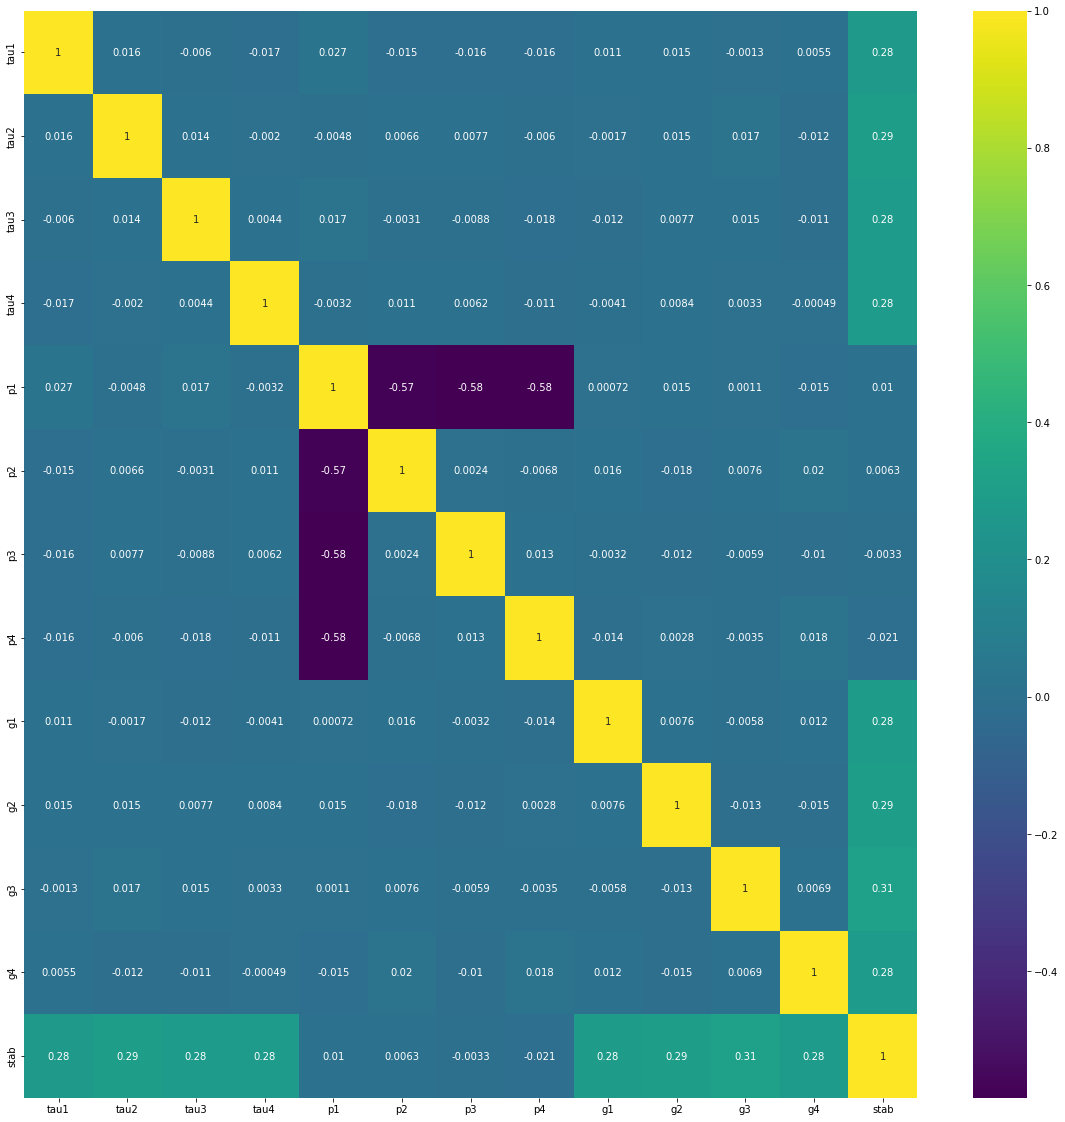

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'viridis', annot=True)
plt.show()

In [10]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [11]:
df 


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [12]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [13]:
#replacing stable with 1 and unstable with 0 
df['stabf'] = df['stabf'].replace({'unstable': 0,
                   'stable': 1})

In [14]:
df= df.drop('stab', axis =1)

In [15]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


In [16]:
X = df.drop(['stabf'], axis = 1)
y = df['stabf']

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1) 


In [18]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

# Question 5, 7 and 19

In [19]:

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1) 


#RandomForest
rf =  RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
print("RandomForest accuracy_score on validation set is : ",accuracy_score(y_valid,rf_pred))
print('--------'*20)




#KNeighbors
knn =  ExtraTreesClassifier (random_state=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)

print("ExtraTrees accuracy_score on validation set is : ",accuracy_score(y_valid,knn_pred))
print('--------'*20)




# LGBM
lgb = LGBMClassifier(random_state=1)
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_valid)
print("LGBM accuracy_score on validation set is : ",accuracy_score(y_valid,lgb_pred))
print('--------'*20)

# XGBoost
xg = XGBClassifier(random_state=1)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_valid)

print("XGBoost accuracy_score on validation set is : ",accuracy_score(y_valid,xg_pred))
print('--------'*20)

RandomForest accuracy_score on validation set is :  0.9295
----------------------------------------------------------------------------------------------------------------------------------------------------------------
ExtraTrees accuracy_score on validation set is :  0.9285
----------------------------------------------------------------------------------------------------------------------------------------------------------------
LGBM accuracy_score on validation set is :  0.9375
----------------------------------------------------------------------------------------------------------------------------------------------------------------
XGBoost accuracy_score on validation set is :  0.9195
----------------------------------------------------------------------------------------------------------------------------------------------------------------


# Question 6

In [20]:
parameters ={'n_estimators':[1000, 300, 500,100],
        'min_samples_split':[2,5,7],
        'min_samples_leaf': [4,6,8],
        'max_features': [None, 'auto', 'log2']}
clf =  ExtraTreesClassifier(random_state = 1)
rng = np.random.RandomState(1)
grid_cv = RandomizedSearchCV(clf, parameters, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = rng)
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Our optimized Random Forest model is:


ExtraTreesClassifier(max_features='log2', min_samples_leaf=6,
                     min_samples_split=7, n_estimators=1000, random_state=1)

# Question 1

In [21]:
knn =  ExtraTreesClassifier (max_features='auto', min_samples_leaf=6, min_samples_split=5, n_estimators=500, random_state=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)

print("extra accuracy_score on validation set is : ",accuracy_score(y_valid,knn_pred))
print('--------'*20)
#927
#921
#9095
#9295

extra accuracy_score on validation set is :  0.9195
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [22]:
knn.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Question 15

In [23]:
knn.feature_importances_

array([0.14095693, 0.14348379, 0.13309002, 0.13538489, 0.00982733,
       0.01281373, 0.01274198, 0.01270686, 0.09292635, 0.10068498,
       0.1046444 , 0.10073872])

In [24]:
feature_importance = pd.DataFrame({'Features': X.columns, 'Importances': knn.feature_importances_})
feature_importance= feature_importance.sort_values('Importances', ascending = False)

In [25]:
feature_importance

,Features,Importances
1,tau2,0.143484
0,tau1,0.140957
3,tau4,0.135385
2,tau3,0.133090
10,g3,0.104644
11,g4,0.100739
9,g2,0.100685
8,g1,0.092926
5,p2,0.012814
6,p3,0.012742


<AxesSubplot:xlabel='Importances', ylabel='Features'>

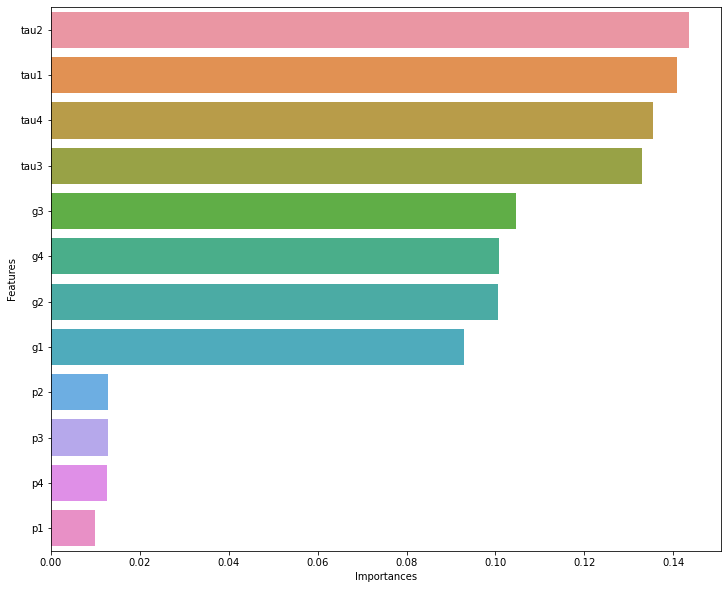

In [26]:
plt.figure(figsize= (12,10))
sns.barplot(x='Importances', y= 'Features', data=feature_importance, label="Feature Importances", orient= 'h')#, color_palette='tab10')
#sns.set_color_palette('hls', 8)